In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import neighbors, metrics
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import cross_validate
import statistics
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
import seaborn as sns


pd.options.display.max_columns = None


data_2015 = pd.read_csv('2015-building-energy-benchmarking.csv', sep=",")
data_2016 = pd.read_csv('2016-building-energy-benchmarking.csv', sep=",")
print(f'Le fichier 2015 contient {data_2015.shape[0]} lignes et {data_2015.shape[1]} colonnes'.format())
print(f'Le fichier 2016 contient {data_2016.shape[0]} lignes et {data_2016.shape[1]} colonnes'.format())

Le fichier 2015 contient 3340 lignes et 47 colonnes
Le fichier 2016 contient 3376 lignes et 46 colonnes


Pour la fin du projet (test du meilleur modèle), nécessité d'utiliser des données plus récentes. Ainsi les bases 2017, 2019 et 2020 sont également chargées et transformées de la même manière que 2015 et 2016.

In [2]:
data_2017 = pd.read_csv('2017_building_energy_benchmarking.csv', sep=",")
data_2019 = pd.read_csv('2019_building_energy_benchmarking.csv', sep=",")
data_2020 = pd.read_csv('2020_building_energy_benchmarking.csv', sep=",")

print(f'Le fichier 2017 contient {data_2017.shape[0]} lignes et {data_2017.shape[1]} colonnes'.format())
print(f'Le fichier 2019 contient {data_2019.shape[0]} lignes et {data_2019.shape[1]} colonnes'.format())
print(f'Le fichier 2020 contient {data_2020.shape[0]} lignes et {data_2020.shape[1]} colonnes'.format())

Le fichier 2017 contient 3461 lignes et 45 colonnes
Le fichier 2019 contient 3581 lignes et 42 colonnes
Le fichier 2020 contient 3628 lignes et 42 colonnes


## 1) Préparation des données
### 1-1) Comparaison 2015 et 2016

In [3]:
data_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [4]:
data_2016.columns.difference(data_2015.columns)

Index(['Address', 'City', 'Comments', 'GHGEmissionsIntensity', 'Latitude',
       'Longitude', 'State', 'TotalGHGEmissions', 'ZipCode'],
      dtype='object')

In [5]:
data_2015.columns.difference(data_2016.columns)

Index(['2010 Census Tracts', 'City Council Districts', 'Comment',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'Location', 'OtherFuelUse(kBtu)', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'Zip Codes'],
      dtype='object')

In [6]:
data_2015['Location'].unique()

array(['{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}',
       '{\'latitude\': \'47.61310583\', \'longitude\': \'-122.33335756\', \'human_address\': \'{"address": "724 PINE ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}',
       '{\'latitude\': \'47.61334897\', \'longitude\': \'-122.33769944\', \'human_address\': \'{"address": "1900 5TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}',
       ...,
       '{\'latitude\': \'47.61649845\', \'longitude\': \'-122.33770787\', \'human_address\': \'{"address": "2030 8TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98121"}\'}',
       '{\'latitude\': \'47.68396954\', \'longitude\': \'-122.2874088\', \'human_address\': \'{"address": "3801 NE 77TH ST", "city": "SEATTLE", "state": "WA", "zip": "98115"}\'}',
       '{\'latitude\': \'47.68396954\', \'longitude\': \'-122.2874088\', \'human_address\': \'{"

In [7]:
## Visualisation des codes batiment présents en 2016 et pas en 2015
diff = np.setdiff1d(data_2016['OSEBuildingID'].unique(),data_2015['OSEBuildingID'].unique())
diff

array([   43,   364,   365,   750, 19456, 20585, 20978, 21103, 21860,
       23437, 23964, 24418, 29390, 49715, 49716, 49964, 49967, 49968,
       49970, 49972, 49979, 49980, 49983, 49986, 49987, 49988, 49990,
       50000, 50003, 50005, 50006, 50011, 50014, 50015, 50017, 50021,
       50022, 50026, 50029, 50030, 50031, 50035, 50037, 50039, 50044,
       50045, 50046, 50047, 50050, 50054, 50056, 50061, 50062, 50068,
       50069, 50070, 50071, 50072, 50074, 50075, 50076, 50078, 50081,
       50082, 50083, 50084, 50086, 50088, 50089, 50090, 50092, 50093,
       50094, 50095, 50098, 50101, 50196, 50198, 50201, 50204, 50207,
       50208, 50210, 50212, 50219, 50220, 50221, 50222, 50223, 50224,
       50225, 50226])

Nous pouvons observer que la plupart des batiments sont présents en 2015 et en 2016. 
De plus, le nombre d'observations est relativement faible dans les 2 dataframes. Fusionner les 2 n'apporterait qu'environ 50 observations en plus. De plus, cela nous imposerait de réaliser un test split réduisant encore plus le nombre d'observations d'entrainement et augmentant ainsi le risque d'avoir des catégories représentées en train et pas en test (ou inversement).  
Cependant, dans l'optique de réaliser des tests sur le 2016, il faut que les 2 DF aient le même format.

### 1-2) Mise en forme identiques des DataFrame 2015 et 2016

In [8]:
def mise_en_forme(df,columns):
    '''
    Fonction permettant de mettre en forme les colonnes et notamment de ne conserver que la valeur de la variable ('description' : 'xxxx')
    
    Paramètres:
    - df : DataFrame
    - columns : Colonne à mettre en forme
    
    Return:
    - df avec la colonne mise en forme
    '''
    df[columns]=df[columns].str.split(':', n=2, expand=True)[1]
    df[columns]=df[columns].str[2:-1]
    return df

In [9]:
# Split de la colonne 'localisation' en 6 colonnes distinctes
data_2015[['Latitude','Longitude','Address','City','State','ZipCode']]=data_2015['Location'].str.split(',', n=6, expand=True)

# Suppression des textes pour ne conserver que les valeurs ('description' : 'xxxx')
mise_en_forme(data_2015,'Latitude')
mise_en_forme(data_2015,'Longitude')
mise_en_forme(data_2015,'City')
mise_en_forme(data_2015,'State')

# Suppression des textes pour ne conserver que les valeurs ('description' : 'xxxx')
data_2015['Address']=data_2015['Address'].str.split(':', n=3, expand=True)[2] 
data_2015['Address']=data_2015['Address'].str[2:-1]
data_2015['Address']=data_2015['Address'].str.lower()
# Suppression des textes pour ne conserver que les valeurs ('description' : 'xxxx')
data_2015['ZipCode']=data_2015['ZipCode'].str.split(':', n=2, expand=True)[1] 
data_2015['ZipCode']=data_2015['ZipCode'].str[2:-4]

# Renomage des colonnes avec les mêmes noms que sur le df de 2016
data_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions','GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity','Comment':'Comments'},inplace=True)


# Suppression des colonnes non utiles présentes en 2015 et pas en 2016
colonnes_a_supp = ['2010 Census Tracts', 'City Council Districts','Location', 'OtherFuelUse(kBtu)', 'SPD Beats','Seattle Police Department Micro Community Policing Plan Areas','Zip Codes']
data_2015.drop(labels=colonnes_a_supp,axis=1,inplace=True)

#Mise en cohérence dans le 2016
data_2016['ZipCode']=pd.to_numeric(data_2016['ZipCode'],errors='coerce')
data_2016['TaxParcelIdentificationNumber']=data_2016['TaxParcelIdentificationNumber'].str.lstrip('0')

In [10]:
# Vérification que les colonnes sont maintenant identiques
data_2015.columns.difference(data_2016.columns)

Index([], dtype='object')

In [11]:
# Fusion des Dataframes 2015 et 2016
data_merge = pd.concat([data_2015,data_2016])
data_merge.reset_index(drop=True,inplace=True)
data_merge.shape

(6716, 46)

### Traitement des années futures

In [12]:
# Suppression de colonnes non cohérentes avec les données 2015 et 2016
data_2017.drop(['DefaultData', 'ComplianceStatus', 'Outlier'],axis=1,inplace=True)
df_annees_futures = pd.concat([data_2017,data_2019,data_2020])

# Récupération des batiments présents dans les années futures et non en 2015 et 2016
diff = np.setdiff1d(df_annees_futures['OSEBuildingID'].unique(),data_merge['OSEBuildingID'].unique())

# Création du DataFrame ne contenant que les batiments inconnus en 2015 et 2016
df_annees_futures=df_annees_futures[df_annees_futures['OSEBuildingID'].isin(diff)].sort_values(['OSEBuildingID'],ascending=True)

# Suppression des doublons sur le code batiment
df_annees_futures.drop_duplicates(subset=['OSEBuildingID'],keep='last',inplace=True)

### 1-3) Vérification des doublons

In [13]:
data_merge.duplicated().sum()

0

In [14]:
data_merge[['PropertyName','TaxParcelIdentificationNumber','YearBuilt','Latitude','Longitude','Address','PrimaryPropertyType']].duplicated(keep=False).sum()

4

In [15]:
data_merge[data_merge[['PropertyName','TaxParcelIdentificationNumber','YearBuilt','Latitude','Longitude','Address','PrimaryPropertyType']].duplicated(keep=False)]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
2145,24536,2015,NonResidential,Non-Refrigerated Warehouse,CLOVERDALE BUSINESS PARK,3224049012,1,GREATER DUWAMISH,1979,1.0,1.0,31360,0,31360,"Non-Refrigerated Warehouse, Retail Store",Non-Refrigerated Warehouse,29640.0,Retail Store,1460.0,NaN,NaN,NaN,NaN,41.1,49.1,83.8,92.2,1279570.0,1526885.0,0.0,177230.0,604734.0,6749.0,674861.0,40.06,1.19,No,NaN,Compliant,NaN,47.52593209,-122.3308402,309 s cloverdale st,SEATTLE,WA,98108
2146,24537,2015,NonResidential,Non-Refrigerated Warehouse,CLOVERDALE BUSINESS PARK,3224049012,1,GREATER DUWAMISH,1979,1.0,1.0,33320,0,33320,"Non-Refrigerated Warehouse, Office",Non-Refrigerated Warehouse,32200.0,Office,1200.0,NaN,NaN,NaN,NaN,67.5,75.7,144.2,152.8,2254220.0,2528550.0,0.0,343447.0,1171888.0,10824.0,1082380.0,65.65,1.82,No,NaN,Compliant,NaN,47.52593209,-122.3308402,309 s cloverdale st,SEATTLE,WA,98108
2147,24538,2015,NonResidential,Non-Refrigerated Warehouse,CLOVERDALE BUSINESS PARK,3224049012,1,GREATER DUWAMISH,1979,1.0,1.0,48020,0,48020,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,47800.0,NaN,NaN,NaN,NaN,NaN,73.0,46.9,52.7,109.7,115.8,2240549.0,2517411.0,0.0,405268.0,1382831.0,8578.0,857775.0,55.20,1.03,No,NaN,Compliant,NaN,47.52593209,-122.3308402,309 s cloverdale st,SEATTLE,WA,98108
2148,24539,2015,NonResidential,Non-Refrigerated Warehouse,CLOVERDALE BUSINESS PARK,3224049012,1,GREATER DUWAMISH,1979,1.0,1.0,27420,0,27420,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,27850.0,NaN,NaN,NaN,NaN,NaN,52.0,40.5,49.6,81.9,91.6,1126690.0,1382032.0,0.0,154072.0,525715.0,6010.0,600997.0,35.58,1.22,No,NaN,Compliant,NaN,47.52593209,-122.3308402,309 s cloverdale st,SEATTLE,WA,98108


In [16]:
# Suppression des doublons
data_merge.drop_duplicates(subset=['PropertyName','TaxParcelIdentificationNumber','YearBuilt','Latitude','Longitude','Address'],keep='last',inplace=True)
data_merge.reset_index(drop=True,inplace=True)
data_merge.shape

(6712, 46)

Les doublons ont été identifiés non pas sur la base de leur numéro d'identification mais selon les propriétés issues du permis de construire. Ainsi, seuls 4 doublons ont été supprimés.  
Néanmoins, conscient que les bases 2015 et 2016 soient quasiment identiques, un test sur les nouveaux batiments des années 2017, 2019 et 2020 sera effectué sur le meilleur modèle linéaire et   
le meilleur non linéaire.

### 1-4) Aperçu des cibles : TotalGHGEmissions et SiteEnergyUse(kBtu)

### Traitement des NA sur les cibles : 

In [17]:
data_merge[data_merge['TotalGHGEmissions'].isna()].shape

(19, 46)

In [18]:
data_merge[data_merge['SiteEnergyUse(kBtu)'].isna()].shape

(15, 46)

In [19]:
# Suppression des ces observations car contiennent trop peu d'information
data_merge.dropna(subset=['TotalGHGEmissions','SiteEnergyUse(kBtu)'],inplace=True)
data_merge.shape

(6693, 46)

### Traitement des valeurs nulles et <0

In [20]:
data_merge[(data_merge['TotalGHGEmissions']<0) | (data_2015['SiteEnergyUse(kBtu)']<0)]

/tmp/ipykernel_291599/4048685325.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_merge[(data_merge['TotalGHGEmissions']<0) | (data_2015['SiteEnergyUse(kBtu)']<0)]


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
6542,49784,2016,NonResidential,Small- and Mid-Sized Office,Bullitt Center,7234600195,3,CENTRAL,2013,1.0,6.0,52000,0,52000,Office,Office,48159.0,NaN,NaN,NaN,NaN,NaN,100.0,7.1,5.0,2.0,-2.1,342726.0938,240132.0938,0.0,-33826.80078,-115417.0,0.0,0.0,-0.8,-0.02,False,NaN,Compliant,NaN,47.61432,-122.31257,1501 E. Madison St.,Seattle,WA,98122.0


In [21]:
data_merge[data_merge['TotalGHGEmissions']==0].shape

(11, 46)

In [22]:
data_merge[data_merge['SiteEnergyUse(kBtu)']==0].shape

(20, 46)

Décision de supprimer ces bâtiments (ce sont les mêmes qui ont la cible à 0)

In [23]:
data_merge.drop(data_merge[data_merge['SiteEnergyUse(kBtu)']==0].index, inplace=True)
data_merge.drop(data_merge[data_merge['TotalGHGEmissions']==0].index, inplace=True)
data_merge.drop(data_merge[data_merge['TotalGHGEmissions']<0].index, inplace=True)
data_merge.reset_index(drop=True,inplace=True)
data_merge.shape

(6670, 46)

## 2) Analyse exploratoire

### 2-0) Regard sur les correlations

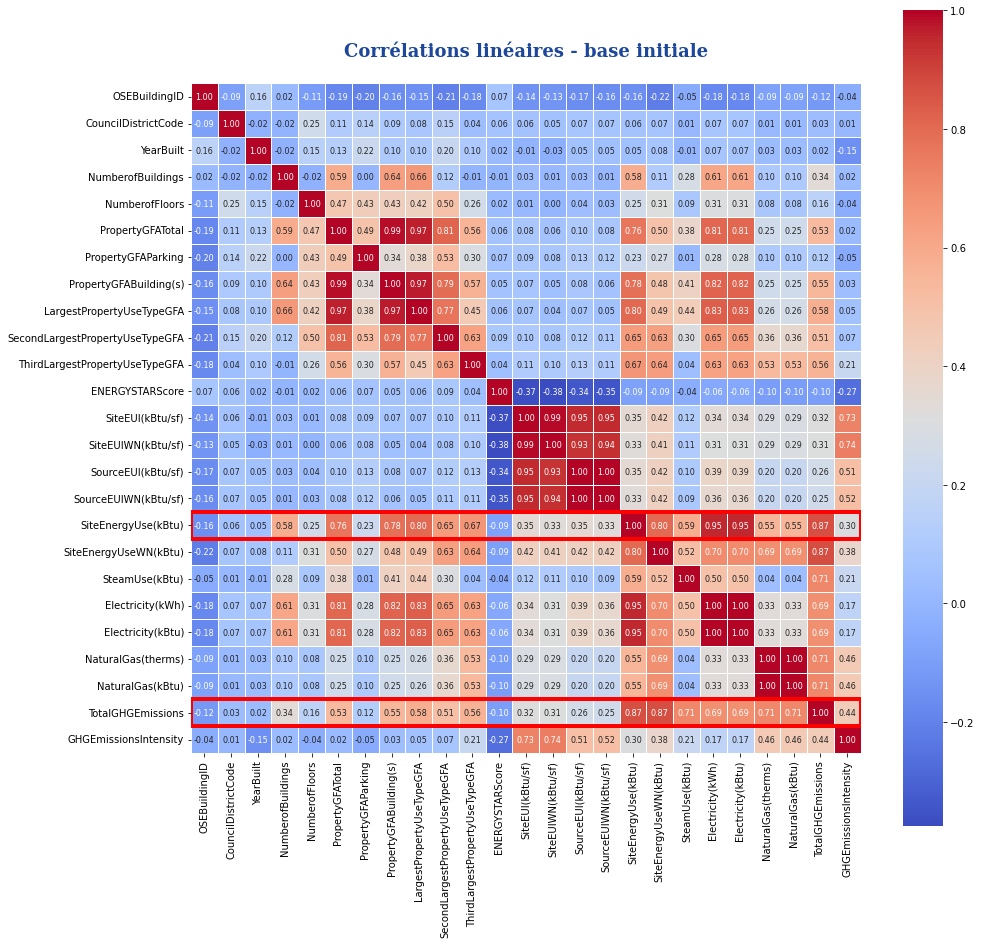

In [24]:
corr_mat = data_merge.drop(['DataYear'],axis=1).corr(method='pearson', min_periods=1)
#heatmap
plt.figure(figsize=(15,15))
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
# mask = np.triu(np.ones_like(corr_mat, dtype=bool))
sns.heatmap(corr_mat, square=True, linewidths=0.5, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size':8}, )
plt.title("Corrélations linéaires - base initiale\n", fontdict=font_title)
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((0, 23), 25, 1, facecolor="none", ec='r', lw=4))
currentAxis.add_patch(Rectangle((0, 16), 25, 1, facecolor="none", ec='r', lw=4))
plt.show()

In [25]:
# Visualisation des coefficients de correlation Pearson en fonction d'un seuil

seuil_corr = 0.7
corr_pairs = corr_mat.unstack().sort_values()
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > seuil_corr)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]  # On ne veut pas voir et les ==0 et les 1 dans le cas de la diagonale de la matrice
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
68,NaturalGas(therms),NaturalGas(kBtu),1.000000
66,Electricity(kBtu),Electricity(kWh),1.000000
64,SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),0.995716
62,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),0.994541
60,PropertyGFATotal,PropertyGFABuilding(s),0.985350
58,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,0.971181
56,PropertyGFATotal,LargestPropertyUseTypeGFA,0.967232
54,Electricity(kWh),SiteEnergyUse(kBtu),0.951997
52,SiteEnergyUse(kBtu),Electricity(kBtu),0.951997
50,SourceEUI(kBtu/sf),SiteEUI(kBtu/sf),0.948148


Cette matrice permet de mettre en évidence un certain nombre de choses :  
    - nos cibles (consommation totale et émissions de CO2) sont très corréllées aux consommations. Elles devront donc être retirées des modèles.  
    - Des variables apparaissent avec plusieurs unités. Conservation que d'une seule.  
    - Des variables apparaissent normalisées (en fonction de la météo) ou non. Conservation que d'une seule.  
    - Enfin les variables GFA sont assez corrélées avec d'autres variables
    
Le critère maximum de corrélation acceptable est fixé à 70%.

In [26]:
# Suppression des colonnes
colonnes_a_supp = ['PropertyName','Address','City', 'State', 'TaxParcelIdentificationNumber','SiteEUIWN(kBtu/sf)',
                   'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)','Electricity(kWh)','NaturalGas(therms)','GHGEmissionsIntensity',
                  'DefaultData', 'Comments','ComplianceStatus', 'ZipCode']
colonnes_a_supp_futur = ['PropertyName','Address','City', 'State', 'TaxParcelIdentificationNumber','SiteEUIWN(kBtu/sf)',
                   'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)','Electricity(kWh)','NaturalGas(therms)','GHGEmissionsIntensity',
                  'ComplianceStatus', 'ZipCode']
data_merge.drop(labels=colonnes_a_supp,axis=1,inplace=True)
df_annees_futures.drop(labels=colonnes_a_supp_futur,axis=1,inplace=True)
data_merge.shape

(6670, 31)

### 2-1) Les types de batiments  

L'étude ne porte que sur les bâtiments non résidentiels

In [27]:
data_merge.BuildingType.value_counts()

NonResidential          2908
Multifamily LR (1-4)    2034
Multifamily MR (5-9)    1134
Multifamily HR (10+)     217
SPS-District K-12        177
Nonresidential COS       153
Campus                    46
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [28]:
# Suppression des batiments résidentiels
data_merge = data_merge[~data_merge['BuildingType'].str.contains("Multifamily")]
df_annees_futures = df_annees_futures[~df_annees_futures['BuildingType'].str.contains("Multifamily")]
data_merge.BuildingType.value_counts()

NonResidential        2908
SPS-District K-12      177
Nonresidential COS     153
Campus                  46
Nonresidential WA        1
Name: BuildingType, dtype: int64

In [29]:
# Correction du type avec une seule occurence
data_merge['BuildingType']=data_merge['BuildingType'].str.replace('Nonresidential WA','NonResidential')
df_annees_futures['BuildingType']=df_annees_futures['BuildingType'].str.replace('Nonresidential WA','NonResidential')

### 2-2) Les PrimaryPropertyType

In [30]:
data_merge[data_merge['DataYear']==2015].PrimaryPropertyType.unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'College/University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility\n', 'Distribution Center', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall/Dormitory',
       'Non-Refrigerated Warehouse', 'Distribution Center\n',
       'SPS-District K-12', 'Worship Facility',
       'Supermarket/Grocery Store', 'Laboratory', 'Self-Storage Facility',
       'Refrigerated Warehouse', 'Restaurant\n', 'Low-Rise Multifamily',
       'Restaurant'], dtype=object)

In [31]:
data_merge[data_merge['DataYear']==2016].PrimaryPropertyType.unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily',
       'Office'], dtype=object)

In [32]:
df_annees_futures.PrimaryPropertyType.unique()

array(['K-12 School', nan, 'Mixed Use Property', 'Mid-Rise Multifamily',
       'Small- and Mid-Sized Office', 'Other', 'Medical Office',
       'Supermarket/Grocery Store',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Recreation', 'Non-Refrigerated Warehouse', 'Strip Mall',
       'Automobile Dealership', 'Multifamily Housing', 'University',
       'College/University', 'Self-Storage Facility', 'Office',
       'Senior Care Community', 'Hotel', 'Retail Store',
       'Worship Facility', 'Manufacturing/Industrial Plant', 'Parking',
       'Refrigerated Warehouse', 'Transportation Terminal/Station'],
      dtype=object)

In [33]:
# Correction de mise en forme afin d'avoir des catégories identiques
data_merge['PrimaryPropertyType']=data_merge['PrimaryPropertyType'].str.rstrip('\n')
data_merge['PrimaryPropertyType']=data_merge['PrimaryPropertyType'].str.replace('Supermarket / Grocery Store','Supermarket/Grocery Store')
data_merge['PrimaryPropertyType']=data_merge['PrimaryPropertyType'].str.replace('Non-Refrigerated Warehouse','Warehouse')
data_merge['PrimaryPropertyType']=data_merge['PrimaryPropertyType'].str.replace('Refrigerated Warehouse','Warehouse')
data_merge['PrimaryPropertyType']=data_merge['PrimaryPropertyType'].str.replace('Residence Hall/Dormitory','Residence Hall')
data_merge['PrimaryPropertyType']=data_merge['PrimaryPropertyType'].str.replace('SPS-District K-12','K-12 School')
data_merge['PrimaryPropertyType']=data_merge['PrimaryPropertyType'].str.replace('Small- and Mid-Sized Office','Office')
data_merge['PrimaryPropertyType']=data_merge['PrimaryPropertyType'].str.replace('College/University','University')

In [34]:
# Correction de mise en forme afin d'avoir des catégories identiques sur les années futures
df_annees_futures['PrimaryPropertyType']=df_annees_futures['PrimaryPropertyType'].str.rstrip('\n')
df_annees_futures['PrimaryPropertyType']=df_annees_futures['PrimaryPropertyType'].str.replace('Supermarket / Grocery Store','Supermarket/Grocery Store')
df_annees_futures['PrimaryPropertyType']=df_annees_futures['PrimaryPropertyType'].str.replace('Non-Refrigerated Warehouse','Warehouse')
df_annees_futures['PrimaryPropertyType']=df_annees_futures['PrimaryPropertyType'].str.replace('Refrigerated Warehouse','Warehouse')
df_annees_futures['PrimaryPropertyType']=df_annees_futures['PrimaryPropertyType'].str.replace('Residence Hall/Dormitory','Residence Hall')
df_annees_futures['PrimaryPropertyType']=df_annees_futures['PrimaryPropertyType'].str.replace('SPS-District K-12','K-12 School')
df_annees_futures['PrimaryPropertyType']=df_annees_futures['PrimaryPropertyType'].str.replace('Small- and Mid-Sized Office','Office')
df_annees_futures['PrimaryPropertyType']=df_annees_futures['PrimaryPropertyType'].str.replace('College/University','University')
df_annees_futures['PrimaryPropertyType']=df_annees_futures['PrimaryPropertyType'].str.replace('Mid-Rise Multifamily','Low-Rise Multifamily')
df_annees_futures['PrimaryPropertyType']=df_annees_futures['PrimaryPropertyType'].str.replace('Repair Services (Vehicle, Shoe, Locksmith, etc)','Retail Store',regex=False)
df_annees_futures['PrimaryPropertyType']=df_annees_futures['PrimaryPropertyType'].str.replace('Other - Recreation','Other')
df_annees_futures['PrimaryPropertyType']=df_annees_futures['PrimaryPropertyType'].str.replace('Strip Mall','Distribution Center')
df_annees_futures['PrimaryPropertyType']=df_annees_futures['PrimaryPropertyType'].str.replace('Automobile Dealership','Retail Store')
df_annees_futures['PrimaryPropertyType']=df_annees_futures['PrimaryPropertyType'].str.replace('Multifamily Housing','Low-Rise Multifamily')
df_annees_futures['PrimaryPropertyType']=df_annees_futures['PrimaryPropertyType'].str.replace('Manufacturing/Industrial Plant','Other')
df_annees_futures['PrimaryPropertyType']=df_annees_futures['PrimaryPropertyType'].str.replace('Parking','Other')
df_annees_futures['PrimaryPropertyType']=df_annees_futures['PrimaryPropertyType'].str.replace('Transportation Terminal/Station','Office')
df_annees_futures['PrimaryPropertyType'].fillna('Other',inplace=True)

### 2-3) Les types d'usage  
Les types d'usages sont divisés en 4 catégories :  
 - List of all proprerty use types
 - LargestPropertyUseType  
 - SecondPropertyUseType  
 - ThridPropertyUseType  
 
Une nouvelle variable correspondant au nombre de type d'utilisation remplacera List of all property use types (qui est trop brouillon en l'état actuel).  
Regroupement de catégories pour LargestPropertyuseTYpe.  
Suprpession des second et third propertyusetype, peu renseignés

### ListOfAllPropertyUseTypes

In [35]:
data_merge['ListOfAllPropertyUseTypes'].value_counts()

Office                                                                                    268
K-12 School                                                                               248
Office, Parking                                                                           232
Non-Refrigerated Warehouse                                                                198
Other                                                                                     121
                                                                                         ... 
Lifestyle Center, Office, Other, Parking, Restaurant                                        1
Financial Office, Office, Parking, Retail Store                                             1
Data Center                                                                                 1
Office, Parking, Personal Services (Health/Beauty, Dry Cleaning, etc)                       1
Fitness Center/Health Club/Gym, Office, Other - Recreation, 

On constate que de nombreuses valeurs sont concaténées dans cette feature.  
L'objectif est de créer une nouvelle variable représantant le nombre de type d'usage qui remplacerait 'ListOfAllPropertyUseTypes' --> **TotalUseTypeNumber**

In [36]:
data_merge['TotalUseTypeNumber'] = [str(word).count(",") + 1 for word in data_merge['ListOfAllPropertyUseTypes'].str.split(',')]
data_merge.drop('ListOfAllPropertyUseTypes', axis=1, inplace=True)
df_annees_futures['TotalUseTypeNumber'] = [str(word).count(",") + 1 for word in df_annees_futures['ListOfAllPropertyUseTypes'].str.split(',')]
df_annees_futures.drop('ListOfAllPropertyUseTypes', axis=1, inplace=True)
data_merge

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,Outlier,Latitude,Longitude,TotalUseTypeNumber
0,1,2015,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.900000,173.500000,6.981428e+06,2023032.0,3.686160e+06,1.272388e+06,249.43,NaN,47.61219025,-122.33799744,1
1,2,2015,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.400000,191.300000,8.354235e+06,0.0,3.905411e+06,4.448985e+06,263.51,NaN,47.61310583,-122.33335756,3
2,3,2015,NonResidential,Hotel,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.600000,242.700000,7.313066e+07,19660404.0,4.976244e+07,3.709900e+06,2061.48,NaN,47.61334897,-122.33769944,3
3,5,2015,NonResidential,Hotel,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.400000,636.300000,2.822932e+07,23458518.0,2.769023e+06,2.001894e+06,1936.34,High Outlier,47.61421585,-122.33660889,1
4,8,2015,NonResidential,Hotel,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.100000,228.800000,1.482910e+07,0.0,6.066245e+06,8.763105e+06,507.70,NaN,47.6137544,-122.3409238,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,50222,2016,Nonresidential COS,Office,2,GREATER DUWAMISH,1990,1.0,1.0,12294,0,12294,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,161.699997,8.497457e+05,0.0,5.242709e+05,3.254750e+05,20.94,NaN,47.56722,-122.31154,1
6666,50223,2016,Nonresidential COS,Other,2,DOWNTOWN,2004,1.0,1.0,16000,0,16000,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,114.199997,9.502762e+05,0.0,3.965461e+05,5.537300e+05,32.17,NaN,47.59625,-122.32283,1
6667,50224,2016,Nonresidential COS,Other,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,13157,Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,NaN,438.200012,744.799988,5.765898e+06,0.0,1.792159e+06,3.973739e+06,223.54,NaN,47.63644,-122.35784,3
6668,50225,2016,Nonresidential COS,Mixed Use Property,1,GREATER DUWAMISH,1989,1.0,1.0,14101,0,14101,Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,NaN,NaN,51.000000,105.300003,7.194712e+05,0.0,3.488702e+05,3.706010e+05,22.11,NaN,47.52832,-122.32431,5


In [37]:
def replace(df,col,key,val):
    ''' 
    Fonction qui modifie dans une colonne donnée, une valeur par une autre (utiliser pour remplacer les valeurs d'une catégorie par une autre)
    Paramètres :
    - df : dataframe
    - col : colonne dans laquelle il faut modifier des valeurs
    - key : valeur à remplacer
    - val : valeur de remplacement
    Return :
    Pas de retour spécifique, juste la colonne en question dans le dataframe aura été modifiée
    '''
    m = [v == key for v in df[col]]
    df.loc[m,col] = val

### LargestPropertyUseType  
   
Afin de limiter le nombre de catégories faiblement remplies, regroupement de certaines catégories. Aucune catégorie sous la barre des 10 représentants.

In [38]:
pd.DataFrame(data_merge['LargestPropertyUseType'].value_counts()).reset_index(drop=False)

,index,LargestPropertyUseType
0,Office,973
1,Non-Refrigerated Warehouse,390
2,K-12 School,255
3,Other,198
4,Retail Store,197
5,Hotel,144
6,Worship Facility,141
7,Distribution Center,105
8,Medical Office,84
9,Supermarket/Grocery Store,77


In [39]:
Liste_medical = ['Residential Care Facility','Personal Services (Health/Beauty, Dry Cleaning, etc)','Outpatient Rehabilitation/Physical Therapy',
                 'Urgent Care/Clinic/Other Outpatient','Laboratory','Hospital (General Medical & Surgical)']
Liste_education = ['Pre-school/Daycare','Adult Education']
Liste_nourriture = ['Food Service','Other - Restaurant/Bar']
Liste_autre = ['Movie Theater','Courthouse','Fire Station','Police Station','Fitness Center/Health Club/Gym','Museum','Other - Services','Performing Arts','Library','Financial Office',
              'Bank Branch','Data Center','Prison/Incarceration','Lifestyle Center','Other - Public Services','Convention Center','Other - Lodging/Residential','Manufacturing/Industrial Plant']
Liste_magasin = ['Wholesale Club/Supercenter','Other - Mall','Automobile Dealership','Repair Services (Vehicle, Shoe, Locksmith, etc)']

for i in Liste_medical:
    replace(data_merge,'LargestPropertyUseType',i,'Other/Specialty Hospital')
for i in Liste_education:
    replace(data_merge,'LargestPropertyUseType',i,'Other - Education')
for i in Liste_nourriture:
    replace(data_merge,'LargestPropertyUseType',i,'Restaurant')
for i in Liste_autre:
    replace(data_merge,'LargestPropertyUseType',i,'Other - Utility')
for i in Liste_magasin:
    replace(data_merge,'LargestPropertyUseType',i,'Strip Mall')

In [40]:
Liste_medical_futur = ['Residential Care Facility','Personal Services (Health/Beauty, Dry Cleaning, etc)','Outpatient Rehabilitation/Physical Therapy',
                 'Urgent Care/Clinic/Other Outpatient','Laboratory','Hospital (General Medical & Surgical)','Senior Living Community']
Liste_education_futur = ['Pre-school/Daycare','Adult Education','College/Uni']
Liste_nourriture_futur = ['Food Service','Other - Restaurant/Bar']
Liste_autre_futur = ['Movie Theater','Courthouse','Fire Station','Police Station','Fitness Center/Health Club/Gym','Museum','Other - Services','Performing Arts','Library','Financial Office','Transportation Terminal/Station'
              'Bank Branch','Data Center','Prison/Incarceration','Lifestyle Center','Other - Public Services','Convention Center','Other - Lodging/Residential','Manufacturing/Industrial Plant','Multifamily']
Liste_magasin_futur = ['Wholesale Club/Supercenter','Other - Mall','Automobile Dealership','Repair Services (Vehicle, Shoe, Locksmith, etc)']

for i in Liste_medical_futur:
    replace(df_annees_futures,'LargestPropertyUseType',i,'Other/Specialty Hospital')
for i in Liste_education_futur:
    replace(df_annees_futures,'LargestPropertyUseType',i,'Other - Education')
for i in Liste_nourriture_futur:
    replace(df_annees_futures,'LargestPropertyUseType',i,'Restaurant')
for i in Liste_autre_futur:
    replace(df_annees_futures,'LargestPropertyUseType',i,'Other - Utility')
for i in Liste_magasin_futur:
    replace(df_annees_futures,'LargestPropertyUseType',i,'Strip Mall')
    
df_annees_futures['LargestPropertyUseType']=df_annees_futures['LargestPropertyUseType'].str.replace('Transportation Terminal/Station','Other - Utility',regex=True)

In [41]:
data_merge.drop(['SecondLargestPropertyUseType','ThirdLargestPropertyUseType'],axis=1,inplace=True)
df_annees_futures.drop(['SecondLargestPropertyUseType','ThirdLargestPropertyUseType'],axis=1,inplace=True)

### 2-4) Neighborhood

In [42]:
data_merge['Neighborhood']=data_merge['Neighborhood'].str.replace('DELRIDGE NEIGHBORHOODS','DELRIDGE')
data_merge['Neighborhood']=data_merge['Neighborhood'].str.upper()
df_annees_futures['Neighborhood']=df_annees_futures['Neighborhood'].str.replace('SHARED: GREATER DUWAMISH &amp; DELRIDGE NEIGHBORHOODS','GREATER DUWAMISH',regex=True)
df_annees_futures['Neighborhood']=df_annees_futures['Neighborhood'].str.replace('DELRIDGE NEIGHBORHOODS','DELRIDGE')
df_annees_futures['Neighborhood']=df_annees_futures['Neighborhood'].str.upper()

In [43]:
df_annees_futures['CouncilDistrictCode'].fillna(1,inplace=True)
df_annees_futures['CouncilDistrictCode'] = df_annees_futures['CouncilDistrictCode'].astype(int)

### 2-5) Les années de construction  

La notion d'âge du batiment est plus facilement interprétable que l'année de construction.    
Création d'une catégorie en lien avec cette feature

In [44]:
data_merge['Age_batiment']=data_merge['DataYear']-data_merge['YearBuilt']
df_annees_futures['Age_batiment']=df_annees_futures['DataYear']-df_annees_futures['YearBuilt']
data_merge.drop(['YearBuilt'],axis=1,inplace=True)
df_annees_futures.drop(['YearBuilt'],axis=1,inplace=True)

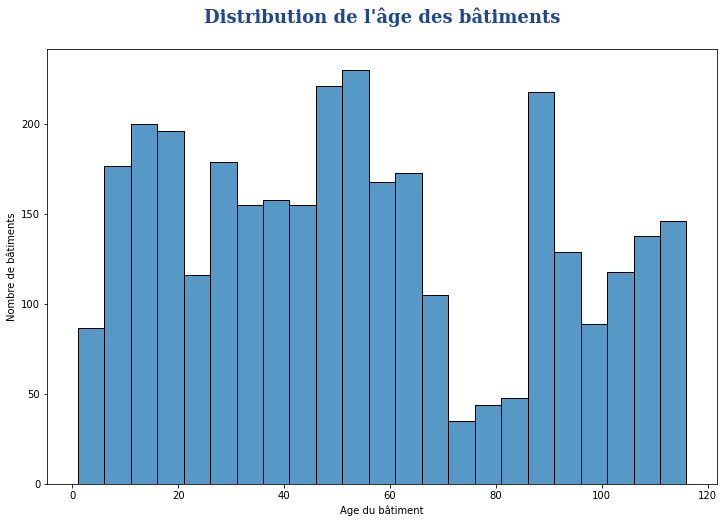

In [45]:
fig = plt.figure(figsize=(12,8))

ax = sns.histplot(data=data_merge, x='Age_batiment', bins=int((data_merge.Age_batiment.max() - data_merge.Age_batiment.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments\n", fontdict=font_title)
plt.show()

In [46]:
data_merge.Age_batiment.value_counts(ascending=False)

16    63
15    62
55    56
46    56
54    54
      ..
83     4
73     3
80     2
72     2
81     1
Name: Age_batiment, Length: 115, dtype: int64

In [47]:
# Création d'une nouvelle catégorie
data_merge['Age_batiment_cat'] =pd.cut(x=data_merge.Age_batiment,bins=[-1,5,10,15,20,25,30,50,75,116],labels=['Moins de 5 ans','Entre 5 et 10 ans','Entre 10 et 15 ans',
                                                                                                                  'Entre 15 et 20 ans','Entre 20 et 25 ans','Entre 25 et 30 ans',
                                                                                                                  'Entre 30 et 50 ans','Entre 50 et 75 ans','Sup à 75 ans'])
df_annees_futures['Age_batiment_cat'] =pd.cut(x=df_annees_futures.Age_batiment,bins=[-1,5,10,15,20,25,30,50,75,125],labels=['Moins de 5 ans','Entre 5 et 10 ans','Entre 10 et 15 ans',
                                                                                                                  'Entre 15 et 20 ans','Entre 20 et 25 ans','Entre 25 et 30 ans',
                                                                                                                  'Entre 30 et 50 ans','Entre 50 et 75 ans','Sup à 75 ans'])
df_annees_futures.loc[df_annees_futures['Age_batiment'] == 0, 'Age_batiment'] = 1

### 2-6) Traitement nombre d'étages et de batiments  

- Détection des NaN  
- Création de nouvelles variables  
- Vérifiaction et limitations si nécessaire des Outliers  

In [48]:
data_merge[['NumberofBuildings','NumberofFloors']].isna().sum()

NumberofBuildings    0
NumberofFloors       8
dtype: int64

### Nombre de batiments

In [49]:
df_annees_futures.NumberofBuildings.value_counts()

1.0    62
0.0     6
2.0     3
5.0     1
Name: NumberofBuildings, dtype: int64

In [50]:
data_merge.NumberofBuildings.value_counts()

1.0      3167
0.0        52
2.0        15
3.0        14
5.0         8
6.0         6
4.0         5
7.0         4
10.0        2
14.0        2
11.0        2
8.0         2
39.0        1
16.0        1
27.0        1
9.0         1
23.0        1
111.0       1
Name: NumberofBuildings, dtype: int64

In [51]:
data_merge.loc[data_merge['NumberofBuildings']>10,:].sort_values('NumberofBuildings',ascending=False)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,Outlier,Latitude,Longitude,TotalUseTypeNumber,Age_batiment,Age_batiment_cat
6569,49967,2016,Campus,University,4,NORTHEAST,111.0,0.0,9320156,0,9320156,College/University,9320156.0,NaN,NaN,NaN,NaN,93.800003,246.600006,873923712.0,84985240.0,657074389.0,0.0,11140.56,NaN,47.65644,-122.31041,1,116,Sup à 75 ans
1499,22062,2015,Campus,University,3,EAST,39.0,2.0,2200000,0,2200000,College/University,1719643.0,318960.0,NaN,NaN,NaN,66.900000,146.100000,115080128.0,0.0,62416157.0,52666569.0,3232.23,NaN,47.60869656,-122.3145944,2,76,Sup à 75 ans
3423,172,2016,Campus,University,1,DELRIDGE,27.0,2.0,441071,0,441071,College/University,483000.0,NaN,NaN,NaN,NaN,79.300003,192.800003,38301744.0,0.0,25314575.0,12987166.0,866.23,NaN,47.547,-122.35307,1,46,Entre 30 et 50 ans
5164,23622,2016,Campus,Other,7,MAGNOLIA / QUEEN ANNE,23.0,1.0,260241,0,260241,Other,260241.0,NaN,NaN,NaN,NaN,130.699997,353.200012,34012980.0,0.0,26894616.0,7118362.0,565.55,NaN,47.65561,-122.38063,1,61,Entre 50 et 75 ans
159,261,2015,Campus,Large Office,1,GREATER DUWAMISH,16.0,2.0,334368,31874,302494,Office,260000.0,78404.0,0.0,NaN,NaN,154.500000,439.300000,52273792.0,0.0,44866796.0,7408855.0,706.26,NaN,47.52440204,-122.3115544,3,35,Entre 30 et 50 ans
3477,261,2016,Campus,Large Office,1,GREATER DUWAMISH,14.0,2.0,334368,31874,302494,Office,240984.0,72963.0,16766.0,NaN,NaN,159.899994,451.200012,53466684.0,0.0,45321378.0,8145300.0,748.55,NaN,47.52429,-122.31234,4,36,Entre 30 et 50 ans
5625,25251,2016,Campus,University,7,MAGNOLIA / QUEEN ANNE,14.0,2.0,537000,0,537000,College/University,533826.0,NaN,NaN,NaN,NaN,169.699997,266.799988,90609640.0,0.0,22619097.0,67990538.0,3768.66,NaN,47.65019,-122.36173,1,71,Entre 50 et 75 ans
125,211,2015,Campus,University,5,NORTHWEST,11.0,2.0,694072,111625,582447,College/University,667265.0,NaN,NaN,NaN,NaN,55.600000,162.300000,37117212.0,0.0,33183593.0,3934997.0,440.31,NaN,47.69879162,-122.3338342,1,45,Entre 30 et 50 ans
3446,211,2016,Campus,University,5,NORTHWEST,11.0,2.0,694072,111625,582447,College/University,667335.0,NaN,NaN,NaN,NaN,53.799999,161.199997,35891484.0,0.0,33450832.0,2440648.0,362.82,NaN,47.69936,-122.33401,1,46,Entre 30 et 50 ans


Ces valeurs ne semblent pas abhérentes. On constate néanmoins que ce sont tous des campus.

In [52]:
# Création d'une nouvelle catégorie
data_merge['NumberofBuildings_cat'] =pd.cut(x=data_merge.NumberofBuildings,bins=[-1,1,3,5,7,111],labels=['1 batiment','Entre 2 et 3 batiments','Entre 4 et 5 batiments'
                                                                                                                ,'Entre 5 et 6 batiments','Au dela de 6 batiments'])
df_annees_futures['NumberofBuildings_cat'] =pd.cut(x=df_annees_futures.NumberofBuildings,bins=[-1,1,3,5,7,111],labels=['1 batiment','Entre 2 et 3 batiments','Entre 4 et 5 batiments'
                                                                                                                ,'Entre 5 et 6 batiments','Au dela de 6 batiments'])

In [53]:
data_merge['NumberofBuildings_cat'].value_counts()

1 batiment                3219
Entre 2 et 3 batiments      29
Au dela de 6 batiments      14
Entre 4 et 5 batiments      13
Entre 5 et 6 batiments      10
Name: NumberofBuildings_cat, dtype: int64

In [54]:
# Dans le dataframe des années futures, rempalcement des NA et des 0 par 1
df_annees_futures.loc[df_annees_futures['NumberofBuildings'] == 0, 'NumberofBuildings'] = 1
df_annees_futures['NumberofBuildings'] = df_annees_futures['NumberofBuildings'].fillna(1)
df_annees_futures['NumberofBuildings_cat'] = df_annees_futures['NumberofBuildings_cat'].fillna('1 batiment')

### Nombre d'étages

In [55]:
data_merge.NumberofFloors.value_counts()

1.0     899
2.0     779
3.0     537
4.0     294
5.0     202
6.0     165
7.0      67
8.0      43
11.0     36
10.0     35
0.0      21
14.0     17
12.0     16
9.0      16
13.0     13
15.0     13
42.0     10
19.0     10
17.0      8
16.0      6
21.0      6
22.0      6
29.0      6
18.0      6
20.0      6
24.0      6
25.0      6
33.0      6
23.0      5
36.0      4
34.0      4
41.0      4
46.0      2
39.0      2
99.0      2
76.0      2
56.0      2
30.0      2
28.0      2
55.0      2
63.0      2
37.0      2
49.0      2
47.0      2
27.0      1
Name: NumberofFloors, dtype: int64

In [56]:
data_merge.loc[data_merge['NumberofFloors']>40,:].sort_values('NumberofFloors',ascending=False).head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,Outlier,Latitude,Longitude,TotalUseTypeNumber,Age_batiment,Age_batiment_cat,NumberofBuildings_cat
4665,21611,2016,NonResidential,Worship Facility,2,GREATER DUWAMISH,1.0,99.0,21948,0,21948,Worship Facility,21948.0,NaN,NaN,NaN,80.0,14.900000,46.599998,3.260012e+05,0.0,326001.0,0.0,2.27,NaN,47.55072,-122.30265,1,39,Entre 30 et 50 ans,1 batiment
1362,21611,2015,NonResidential,Worship Facility,2,GREATER DUWAMISH,1.0,99.0,21948,0,21948,Worship Facility,21948.0,NaN,NaN,NaN,54.0,14.500000,45.500000,3.182050e+05,0.0,318218.0,0.0,2.22,NaN,47.55057128,-122.302943,1,38,Entre 30 et 50 ans,1 batiment
3872,775,2016,NonResidential,Large Office,7,DOWNTOWN,1.0,76.0,1952220,319400,1632820,Office,1680937.0,319368.0,NaN,2017201620152012200920072006,86.0,55.299999,167.300003,9.293764e+07,0.0,87851862.0,5085763.0,882.56,NaN,47.60454,-122.33072,2,31,Entre 30 et 50 ans,1 batiment
578,775,2015,NonResidential,Large Office,7,DOWNTOWN,1.0,76.0,1952220,319400,1632820,Office,1680937.0,319368.0,NaN,"2016, 2015, 2012, 2009, 2007, 2006",84.0,56.300000,171.900000,9.456009e+07,0.0,90754881.0,3808965.0,834.96,NaN,47.60466039,-122.33028619,2,30,Entre 25 et 30 ans,1 batiment
3548,357,2016,Nonresidential COS,Large Office,3,DOWNTOWN,1.0,63.0,1354987,159600,1195387,Office,1191115.0,159599.0,18656.0,2014201320112010200920082007,89.0,50.400002,158.100006,6.157618e+07,0.0,61576180.0,0.0,429.27,NaN,47.60501,-122.32988,2,26,Entre 25 et 30 ans,1 batiment


Seul le premier bâtiment parait disproportionné. D'autant plus qu'il s'agit d'une église (donc à priori, pas 99 étages)
Limitation via tous les bâtiments de même type (5 étages maxi).

In [57]:
# Limitation de tous les types de bâtiments : Workship Facility à 5 étages maximum
mask = (data_merge['PrimaryPropertyType'] == 'Worship Facility')
valeur_a_corriger = data_merge[mask]

data_merge.loc[mask, 'NumberofFloors'] = 5

data_merge.shape

(3285, 31)

In [58]:
# Limitation de tous les types de bâtiments : Workship Facility à 5 étages maximum - pour les années futures
mask = (df_annees_futures['PrimaryPropertyType'] == 'Worship Facility')
valeur_a_corriger = df_annees_futures[mask]

df_annees_futures.loc[mask, 'NumberofFloors'] = 5

In [59]:
# Imputation des NaN par 1 (on ne peut pas avoir 0 étage)

data_merge['NumberofFloors'].fillna(1,inplace=True)
df_annees_futures['NumberofFloors'].fillna(1,inplace=True)

In [60]:
# Création d'une nouvelle catégorie
data_merge['NumberofFloors_cat'] =pd.cut(x=data_merge.NumberofFloors,bins=[-1,1,2,3,4,5,8,12,76],labels=['1 etage','2 etages','3 etages','4 etages','5 etages',
                                                                                                        'Entre 5 et 8 etages','Entre 8 et 12 etages','Sup a 12 etages'])
df_annees_futures['NumberofFloors_cat'] =pd.cut(x=df_annees_futures.NumberofFloors,bins=[-1,1,2,3,4,5,8,12,76],labels=['1 etage','2 etages','3 etages','4 etages','5 etages',
                                                                                                        'Entre 5 et 8 etages','Entre 8 et 12 etages','Sup a 12 etages'])

In [61]:
data_merge['NumberofFloors_cat'].value_counts()

1 etage                 888
2 etages                704
3 etages                513
5 etages                343
4 etages                294
Entre 5 et 8 etages     275
Sup a 12 etages         165
Entre 8 et 12 etages    103
Name: NumberofFloors_cat, dtype: int64

### 2-7) Les surfaces

Nous avons remarqué sur la matrice des corrélation, de fortes relations linéaires entre les surfaces.  
L'objectif est donc de créer de nouvelles variables moins corrélées en remplacement des surfaces.

Liste des features surfaces :  
- PropertyGFATotal : Surface totale  = batiments + parkings  
- PropertyGFABuilding(s) : Surface des batiments  
- LargestPropertyUseTypeGFA : Surface de la propriété principale  
- SecondLargestPropertyUseTypeGFA : Surface de la propriété secondaire  
- ThirdLargestPropertyUseTypeGFA : Surface de la propriété tertiaire      

Les nouvelles variables seront :
- % de la surface des bâtiments
- surface par étage
- surface par immeuble
- conservation de la surface totale

In [62]:
# Création des catégories et suppression des colonnes
data_merge['Surface_taux_batiments'] = data_merge['PropertyGFABuilding(s)'] / data_merge['PropertyGFATotal']
data_merge['Surface_par_etage'] = data_merge['PropertyGFATotal'] / data_merge['NumberofFloors']
data_merge['Surface_par_batiment'] = data_merge['PropertyGFATotal'] / data_merge['NumberofBuildings']

df_annees_futures['Surface_taux_batiments'] = df_annees_futures['PropertyGFABuilding(s)'] / df_annees_futures['PropertyGFATotal']
df_annees_futures['Surface_par_etage'] = df_annees_futures['PropertyGFATotal'] / df_annees_futures['NumberofFloors']
df_annees_futures['Surface_par_batiment'] = df_annees_futures['PropertyGFATotal'] / df_annees_futures['NumberofBuildings']

data_merge.drop(['PropertyGFABuilding(s)','PropertyGFAParking','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA'],axis=1,inplace=True)
df_annees_futures.drop(['PropertyGFABuilding(s)','PropertyGFAParking','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA'],axis=1,inplace=True)

data_merge.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,TotalUseTypeNumber,Age_batiment,Surface_taux_batiments,Surface_par_etage,Surface_par_batiment
count,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3.285000e+03,2206.000000,3285.000000,3285.000000,3.285000e+03,3.285000e+03,3.285000e+03,3.285000e+03,3285.000000,3285.000000,3285.000000,3285.000000,3.285000e+03,3285.0
mean,15987.460883,2015.501674,4.369863,1.118417,4.208219,1.157641e+05,64.809157,71.982770,176.590046,8.121136e+06,4.970081e+05,5.672904e+06,1.884896e+06,178.017117,1.875799,54.021918,0.936707,inf,inf
std,13394.900760,0.500073,2.194669,2.230268,6.129579,2.513000e+05,28.545914,72.388204,180.908880,2.533829e+07,5.245572e+06,1.746715e+07,7.925691e+06,668.745877,1.194706,32.769302,0.148379,NaN,NaN
min,1.000000,2015.000000,1.000000,0.000000,0.000000,1.128500e+04,1.000000,0.200000,-2.000000,1.144100e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.080000,1.000000,1.000000,-1.502318,3.230769e+03,4300.0
25%,581.000000,2015.000000,2.000000,1.000000,1.000000,2.940000e+04,47.000000,33.500000,77.000000,1.241432e+06,0.000000e+00,7.293970e+05,0.000000e+00,19.890000,1.000000,27.000000,1.000000,1.274050e+04,29079.0
50%,21129.000000,2016.000000,4.000000,1.000000,3.000000,4.906600e+04,72.000000,52.000000,131.800003,2.545405e+06,0.000000e+00,1.636098e+06,4.860440e+05,49.260000,2.000000,50.000000,1.000000,2.240500e+04,48924.0
75%,24563.000000,2016.000000,7.000000,1.000000,5.000000,1.049000e+05,89.000000,82.000000,206.400000,6.963616e+06,0.000000e+00,4.897760e+06,1.481167e+06,139.240000,2.000000,86.000000,1.000000,3.792200e+04,106041.0
max,50226.000000,2016.000000,7.000000,111.000000,76.000000,9.320156e+06,100.000000,834.400024,2620.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000,13.000000,116.000000,1.000029,inf,inf


In [63]:
data_merge[(data_merge['Surface_taux_batiments']<0) ]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,Outlier,Latitude,Longitude,TotalUseTypeNumber,Age_batiment,Age_batiment_cat,NumberofBuildings_cat,NumberofFloors_cat,Surface_taux_batiments,Surface_par_etage,Surface_par_batiment
3123,29788,2015,NonResidential,Office,7,MAGNOLIA / QUEEN ANNE,1.0,5.0,54015,Office,NaN,65.0,64.0,200.9,3455247.0,0.0,3455391.0,0.0,24.09,NaN,47.62496806,-122.359705,1,33,Entre 30 et 50 ans,1 batiment,5 etages,-0.801814,10803.0,54015.0
3306,50002,2015,NonResidential,Other,4,NORTHEAST,1.0,3.0,33648,Parking,NaN,NaN,35.6,111.9,1389553.0,0.0,1389610.0,0.0,9.69,NaN,47.66411096,-122.3166394,2,1,Moins de 5 ans,1 batiment,3 etages,-1.502318,11216.0,33648.0


In [64]:
# Suppression des valeurs pour lesquels les surfaces sont mal renseignées. C'est à dire que le taux de surface de batiment est <0

data_merge.drop(data_merge[(data_merge['Surface_taux_batiments']<0)].index, inplace=True)
df_annees_futures.drop(df_annees_futures[(df_annees_futures['Surface_taux_batiments']<0)].index, inplace=True)
data_merge.shape

(3283, 30)

On constate également des valeurs infinies sur les variables nouvellement crées liées à une division par 0.  

In [65]:
print(data_merge[(data_merge.Surface_par_etage == np.inf) | (data_merge.Surface_par_batiment == np.inf)].shape)
data_merge[(data_merge.Surface_par_etage == np.inf) | (data_merge.Surface_par_batiment == np.inf)].head()

(72, 30)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,Outlier,Latitude,Longitude,TotalUseTypeNumber,Age_batiment,Age_batiment_cat,NumberofBuildings_cat,NumberofFloors_cat,Surface_taux_batiments,Surface_par_etage,Surface_par_batiment
164,267,2015,NonResidential,Hotel,7,DOWNTOWN,1.0,0.0,934292,Hotel,NaN,NaN,115.7,271.7,63811044.0,0.0,39667989.0,24144689.0,1558.85,NaN,47.61267744,-122.33393177,5,16,Entre 15 et 20 ans,1 batiment,1 etage,1.000000,inf,934292.0
487,656,2015,NonResidential,Medical Office,3,EAST,1.0,0.0,225982,Medical Office,NaN,61.0,92.7,225.6,18558162.0,6765824.0,11792829.0,0.0,604.45,NaN,47.60967963,-122.3231052,1,11,Entre 10 et 15 ans,1 batiment,1 etage,1.000000,inf,225982.0
488,657,2015,NonResidential,Mixed Use Property,7,DOWNTOWN,1.0,0.0,516407,Parking,NaN,19.0,94.8,220.5,48981052.0,0.0,29882718.0,19099575.0,1222.69,NaN,47.617939,-122.33738708,7,9,Entre 5 et 10 ans,1 batiment,1 etage,1.000000,inf,516407.0
563,758,2015,NonResidential,Other,7,DOWNTOWN,1.0,0.0,947987,Strip Mall,NaN,NaN,64.5,202.5,48143224.0,0.0,48145216.0,0.0,335.63,NaN,47.61287405,-122.335276,4,16,Entre 15 et 20 ans,1 batiment,1 etage,0.535663,inf,947987.0
1766,23311,2015,NonResidential,Other,3,EAST,1.0,0.0,274568,NaN,NaN,NaN,91.9,194.4,25246386.0,13364736.0,11882142.0,0.0,1114.43,NaN,47.60830458,-122.3233504,1,70,Entre 50 et 75 ans,1 batiment,1 etage,1.000000,inf,274568.0


In [66]:
# Correction des valeurs infinies par 1e-15 (au cas où on transforme en log derrière)
data_merge['Surface_par_batiment'] = np.where(((data_merge.Surface_par_batiment == np.inf) & (data_merge.NumberofBuildings == 0)),1e-15, data_merge.Surface_par_batiment)
data_merge['Surface_par_etage'] = np.where(((data_merge.Surface_par_etage == np.inf) & (data_merge.NumberofFloors == 0)),1e-15, data_merge.Surface_par_etage)

df_annees_futures['Surface_par_batiment'] = np.where(((df_annees_futures.Surface_par_batiment == np.inf) & (df_annees_futures.NumberofBuildings == 0)),1e-15, df_annees_futures.Surface_par_batiment)
df_annees_futures['Surface_par_etage'] = np.where(((df_annees_futures.Surface_par_etage == np.inf) & (df_annees_futures.NumberofFloors == 0)),1e-15, df_annees_futures.Surface_par_etage)

In [67]:
# Imputation des NaN sur les types de surfaces
data_merge['LargestPropertyUseType'].fillna('Missing',inplace=True)
df_annees_futures['LargestPropertyUseType'].fillna('Missing',inplace=True)

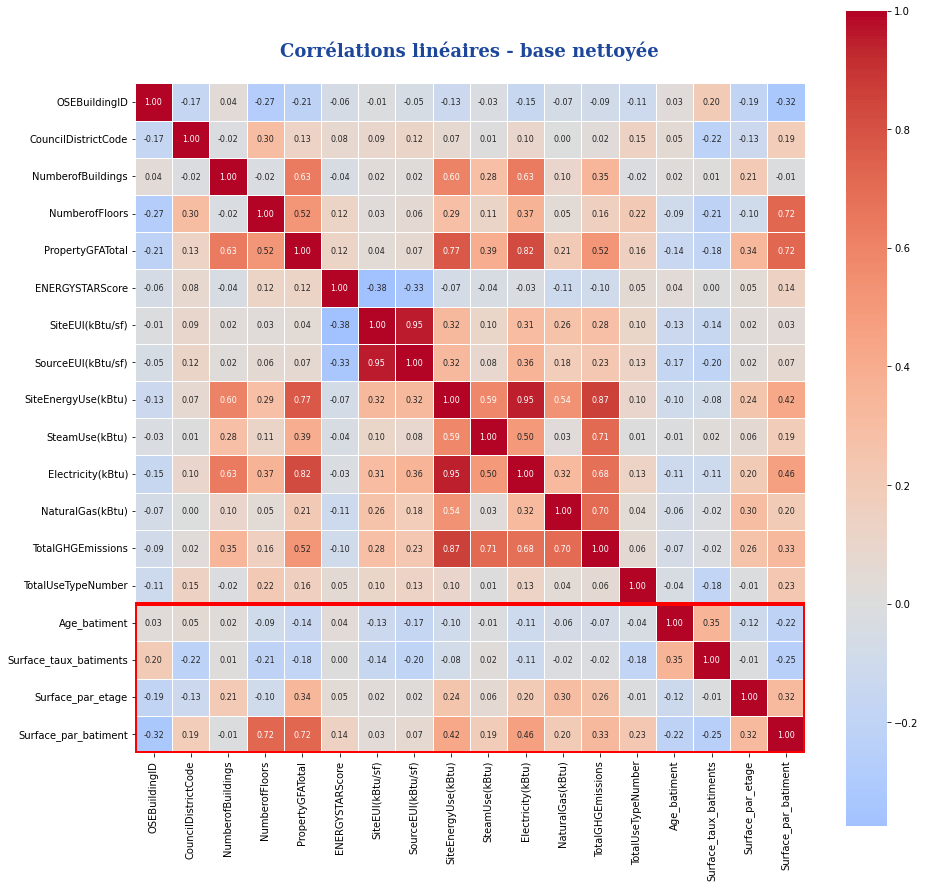

In [68]:
# Vérification des corrélations linéaires
corr = data_merge.drop(['DataYear'],axis=1).corr()
mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True,square=True, linewidths=0.5, fmt=".2f", annot_kws={'size':8}, 
                  center=0, cmap="coolwarm")
plt.title(f"Corrélations linéaires - base nettoyée\n", fontdict=font_title)
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((0, 14), 18, 4, facecolor="none", ec='red', lw=4))
plt.show()

On constate que nos nouvelles variables ne sont plus correlées entre elles mise à part Surface_par_batiment. Cette feature ne sera probablement pas conservée par la suite.

### 2-8) Traitement de la lat et long par une position unique
Création d'une nouvelle variable correspondant à la distance Cette position sera la différence avec le barycentre des positions des batiments

In [69]:
# Passage de la lat et long en float32
data_merge['Latitude'] = pd.to_numeric(data_merge['Latitude'],errors='coerce')
data_merge['Longitude'] = pd.to_numeric(data_merge['Longitude'],errors='coerce')
df_annees_futures['Latitude'] = pd.to_numeric(df_annees_futures['Latitude'],errors='coerce')
df_annees_futures['Longitude'] = pd.to_numeric(df_annees_futures['Longitude'],errors='coerce')
data_merge[['Latitude','Longitude']].describe()

,Latitude,Longitude
count,3283.000000,3283.000000
mean,47.615966,-122.333017
std,0.047930,0.024462
min,47.499170,-122.411820
25%,47.585660,-122.343280
50%,47.612300,-122.333030
75%,47.649105,-122.321891
max,47.733870,-122.258640


In [70]:
from math import radians, cos, sin, asin, sqrt

#Coordonnées du centre de Seattle
seattle_lat = 47.6062
seattle_lon = -122.3321

def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d

In [71]:
data_merge['harvesine_distance'] = [haversine_distance(seattle_lat, seattle_lon, x, y) for x, y in zip(data_merge.Latitude.astype(float), data_merge.Longitude.astype(float))]
df_annees_futures['harvesine_distance'] = [haversine_distance(seattle_lat, seattle_lon, x, y) for x, y in zip(df_annees_futures.Latitude.astype(float), df_annees_futures.Longitude.astype(float))]

In [72]:
import folium
import folium.plugins

seattle_map = folium.Map(location=[seattle_lat, seattle_lon], zoom_start=11)

#Clusters
marker_cluster = folium.plugins.MarkerCluster().add_to(seattle_map)
for lat, lng, in zip(data_2015.Latitude, data_2015.Longitude):
    folium.Marker(location=[lat, lng]).add_to(marker_cluster)

seattle_map

### 2-9) Création des catégories pour les consommations d'énergie.
L'objectif ici est de créer des nouvelles variables. Ces variables représentant **la proportion** d'utilisation d'un type d'énergie.  

Avant de créer les 3 variables sur les proportions, vérification des potentielles erreurs conduisant à des proportions négatives.  
En effet, la somme des 3 consommations ne doit pas dépasser la conso totale.  
Il faut également veiller à ne pas avoir de consommations négatives.  

### Visualisation des potentielles erreurs

In [73]:
#Visualisation des données pour lesquelles la conso total est inférieure à la somme des conso unitaires
data_merge[data_merge['SiteEnergyUse(kBtu)'] < (data_merge['Electricity(kBtu)'] + data_merge['NaturalGas(kBtu)'] + data_merge['SteamUse(kBtu)'])]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,Outlier,Latitude,Longitude,TotalUseTypeNumber,Age_batiment,Age_batiment_cat,NumberofBuildings_cat,NumberofFloors_cat,Surface_taux_batiments,Surface_par_etage,Surface_par_batiment,harvesine_distance
0,1,2015,NonResidential,Hotel,7,DOWNTOWN,1.0,12.0,88434,Hotel,NaN,65.0,78.900000,173.500000,6.981428e+06,2023032.0,3.686160e+06,1.272388e+06,249.43,NaN,47.612190,-122.337997,1,88,Sup à 75 ans,1 batiment,Entre 8 et 12 etages,1.000000,7369.500000,88434.0,0.496412
1,2,2015,NonResidential,Hotel,7,DOWNTOWN,1.0,11.0,103566,Hotel,NaN,51.0,94.400000,191.300000,8.354235e+06,0.0,3.905411e+06,4.448985e+06,263.51,NaN,47.613106,-122.333358,3,19,Entre 15 et 20 ans,1 batiment,Entre 8 et 12 etages,0.854547,9415.090909,103566.0,0.480394
2,3,2015,NonResidential,Hotel,7,DOWNTOWN,1.0,41.0,961990,Hotel,NaN,18.0,96.600000,242.700000,7.313066e+07,19660404.0,4.976244e+07,3.709900e+06,2061.48,NaN,47.613349,-122.337699,3,46,Entre 30 et 50 ans,1 batiment,Sup a 12 etages,1.000000,23463.170732,961990.0,0.558193
3,5,2015,NonResidential,Hotel,7,DOWNTOWN,1.0,10.0,61320,Hotel,NaN,1.0,460.400000,636.300000,2.822932e+07,23458518.0,2.769023e+06,2.001894e+06,1936.34,High Outlier,47.614216,-122.336609,1,89,Sup à 75 ans,1 batiment,Entre 8 et 12 etages,1.000000,6132.000000,61320.0,0.591915
4,8,2015,NonResidential,Hotel,7,DOWNTOWN,1.0,18.0,119890,Hotel,NaN,67.0,120.100000,228.800000,1.482910e+07,0.0,6.066245e+06,8.763105e+06,507.70,NaN,47.613754,-122.340924,3,35,Entre 30 et 50 ans,1 batiment,Sup a 12 etages,0.896071,6660.555556,119890.0,0.663901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6656,50201,2016,Nonresidential COS,Other,6,BALLARD,1.0,1.0,11968,Other - Utility,NaN,NaN,65.500000,139.199997,7.834230e+05,0.0,4.032431e+05,3.801800e+05,23.00,NaN,47.693300,-122.377170,1,6,Entre 5 et 10 ans,1 batiment,1 etage,1.000000,11968.000000,11968.0,6.368745
6657,50204,2016,Nonresidential COS,Other,5,NORTH,1.0,1.0,11285,Other - Utility,NaN,NaN,57.200001,140.000000,6.456654e+05,0.0,4.317954e+05,2.138700e+05,14.37,NaN,47.721260,-122.297350,1,67,Entre 50 et 75 ans,1 batiment,1 etage,1.000000,11285.000000,11285.0,8.107016
6660,50210,2016,Nonresidential COS,Office,7,MAGNOLIA / QUEEN ANNE,1.0,1.0,13661,Office,NaN,75.0,36.799999,115.500000,5.026677e+05,0.0,5.026678e+05,0.000000e+00,3.50,NaN,47.635720,-122.375250,1,64,Entre 50 et 75 ans,1 batiment,1 etage,1.000000,13661.000000,13661.0,2.861288
6662,50219,2016,Nonresidential COS,Mixed Use Property,3,CENTRAL,1.0,1.0,20050,Other - Recreation,NaN,NaN,90.400002,175.199997,1.813404e+06,0.0,7.694531e+05,1.043951e+06,60.81,NaN,47.607750,-122.302250,4,22,Entre 20 et 25 ans,1 batiment,1 etage,1.000000,20050.000000,20050.0,1.393667


In [74]:
# Création de catégories repésentant le % d'utilisation d'un type d'énergie
data_merge['Electricity_proportion'] =  data_merge['Electricity(kBtu)'] / data_merge['SiteEnergyUse(kBtu)']
data_merge['NaturalGas_proportion'] = data_merge['NaturalGas(kBtu)'] / data_merge['SiteEnergyUse(kBtu)']
data_merge['Steam_proportion'] = data_merge['SteamUse(kBtu)'] / data_merge['SiteEnergyUse(kBtu)']

# Correction des proportions négatives
data_merge['Electricity_proportion'].clip(lower=0,upper=100,inplace=True)
data_merge['NaturalGas_proportion'].clip(lower=0,upper=100,inplace=True)
data_merge['Steam_proportion'].clip(lower=0,upper=100,inplace=True)

data_merge.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,Latitude,Longitude,TotalUseTypeNumber,Age_batiment,Surface_taux_batiments,Surface_par_etage,Surface_par_batiment,harvesine_distance,Electricity_proportion,NaturalGas_proportion,Steam_proportion
count,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3.283000e+03,2205.000000,3283.000000,3283.000000,3.283000e+03,3.283000e+03,3.283000e+03,3.283000e+03,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000,3.283000e+03,3.283000e+03,3283.000000,3283.000000,3283.000000,3283.000000
mean,15972.896436,2015.501980,4.369175,1.118489,4.208346,1.158080e+05,64.809070,71.996284,176.602345,8.124608e+06,4.973109e+05,5.674884e+06,1.886044e+06,178.115276,47.615966,-122.333017,1.876028,54.044472,0.937979,3.336942e+04,1.063788e+05,2.795850,0.701664,0.275692,0.021125
std,13383.644359,0.500072,2.194847,2.230946,6.131394,2.513702e+05,28.552389,72.407336,180.959972,2.534561e+07,5.247155e+06,1.747227e+07,7.927969e+06,668.937752,0.047930,0.024462,1.194970,32.764154,0.138905,4.871953e+04,1.824905e+05,2.210306,0.261392,0.262345,0.090834
min,1.000000,2015.000000,1.000000,0.000000,0.000000,1.128500e+04,1.000000,0.200000,-2.000000,1.144100e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.080000,47.499170,-122.411820,1.000000,1.000000,0.104977,1.000000e-15,1.000000e-15,0.017588,0.000000,0.000000,0.000000
25%,580.500000,2015.000000,2.000000,1.000000,1.000000,2.940000e+04,47.000000,33.500000,77.000000,1.237790e+06,0.000000e+00,7.283915e+05,0.000000e+00,19.910000,47.585660,-122.343280,1.000000,27.000000,1.000000,1.250425e+04,2.838000e+04,0.860410,0.495267,0.000000,0.000000
50%,21125.000000,2016.000000,4.000000,1.000000,3.000000,4.906600e+04,72.000000,52.000000,131.800003,2.545405e+06,0.000000e+00,1.636098e+06,4.871670e+05,49.280000,47.612300,-122.333030,2.000000,50.000000,1.000000,2.219600e+04,4.723700e+04,2.238139,0.707117,0.238336,0.000000
75%,24561.500000,2016.000000,7.000000,1.000000,5.000000,1.049805e+05,89.000000,82.000000,206.400000,6.972522e+06,0.000000e+00,4.901002e+06,1.481348e+06,139.290000,47.649105,-122.321891,2.000000,86.000000,1.000000,3.741000e+04,1.000830e+05,4.241887,0.999981,0.485721,0.000000
max,50226.000000,2016.000000,7.000000,111.000000,76.000000,9.320156e+06,100.000000,834.400024,2620.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000,47.733870,-122.258640,13.000000,116.000000,1.000029,1.100000e+06,2.200000e+06,8.843744,1.000087,1.000000,0.830998


In [75]:
# Création de catégories repésentant le % d'utilisation d'un type d'énergie - pour les années futures
df_annees_futures['Electricity_proportion'] =  df_annees_futures['Electricity(kBtu)'] / df_annees_futures['SiteEnergyUse(kBtu)']
df_annees_futures['NaturalGas_proportion'] = df_annees_futures['NaturalGas(kBtu)'] / df_annees_futures['SiteEnergyUse(kBtu)']
df_annees_futures['Steam_proportion'] = df_annees_futures['SteamUse(kBtu)'] / df_annees_futures['SiteEnergyUse(kBtu)']

# Correction des proportions négatives
df_annees_futures['Electricity_proportion'].clip(lower=0,upper=100,inplace=True)
df_annees_futures['NaturalGas_proportion'].clip(lower=0,upper=100,inplace=True)
df_annees_futures['Steam_proportion'].clip(lower=0,upper=100,inplace=True)

In [76]:
data_merge.isna().sum()

OSEBuildingID                  0
DataYear                       0
BuildingType                   0
PrimaryPropertyType            0
CouncilDistrictCode            0
Neighborhood                   0
NumberofBuildings              0
NumberofFloors                 0
PropertyGFATotal               0
LargestPropertyUseType         0
YearsENERGYSTARCertified    3097
ENERGYSTARScore             1078
SiteEUI(kBtu/sf)               0
SourceEUI(kBtu/sf)             0
SiteEnergyUse(kBtu)            0
SteamUse(kBtu)                 0
Electricity(kBtu)              0
NaturalGas(kBtu)               0
TotalGHGEmissions              0
Outlier                     3237
Latitude                       0
Longitude                      0
TotalUseTypeNumber             0
Age_batiment                   0
Age_batiment_cat               0
NumberofBuildings_cat          0
NumberofFloors_cat             0
Surface_taux_batiments         0
Surface_par_etage              0
Surface_par_batiment           0
harvesine_

### 2-10) Traitement des cibles

### 2-10-1) Aperçu des distributions

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


Text(0.5, 1.0, 'Distribution log(Consommation)')

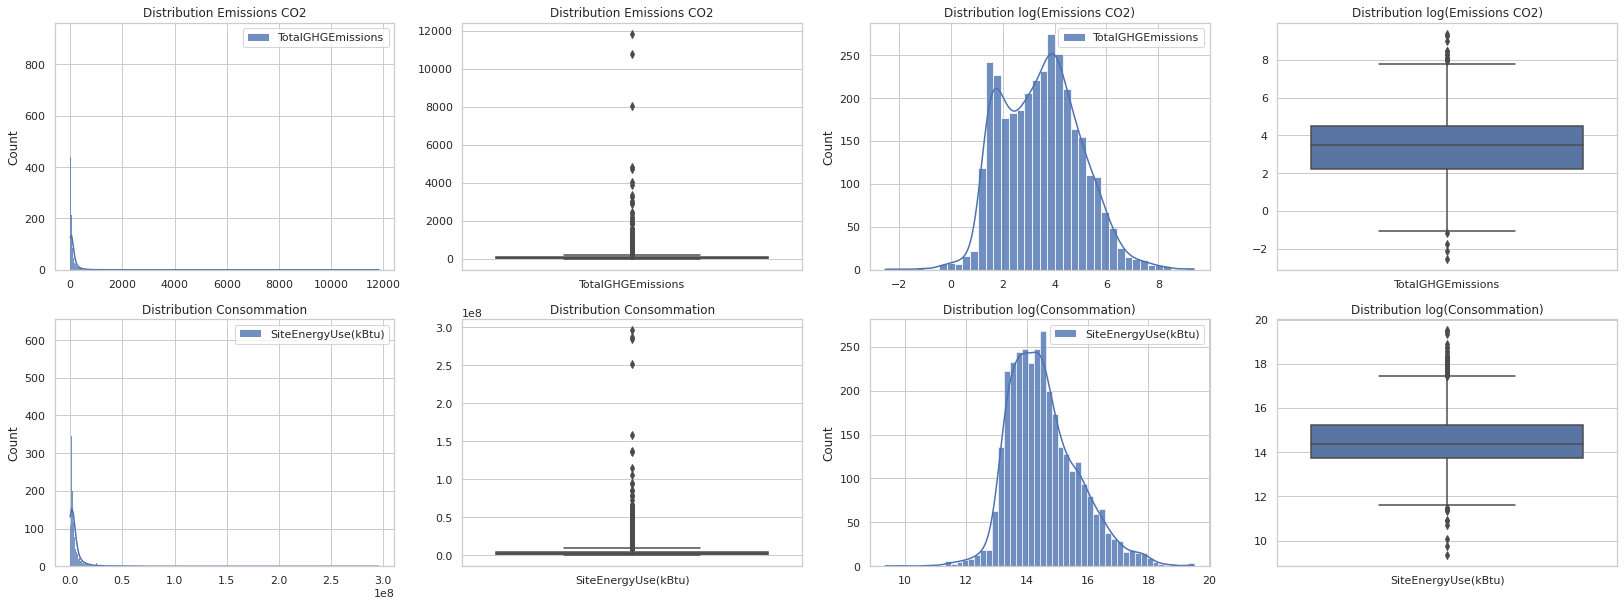

In [77]:
sns.set()
plt.rcParams["figure.figsize"] = (28,10)

sns.set(style="whitegrid",font_scale = 1)  # grille du fond + taille de toutes les polices
fig, axes = plt.subplots(2,4)

sns.histplot(data=data_2015[['TotalGHGEmissions']],alpha=0.8,kde=True,ax=axes[0,0])
sns.boxplot(data=(data_2015[['TotalGHGEmissions']]),ax=axes[0,1])
sns.histplot(data=np.log(data_2015[['TotalGHGEmissions']]),alpha=0.8,kde=True,ax=axes[0,2])
sns.boxplot(data=np.log(data_2015[['TotalGHGEmissions']]),ax=axes[0,3])

sns.histplot(data=data_2015[['SiteEnergyUse(kBtu)']],alpha=0.8,kde=True,ax=axes[1,0])
sns.boxplot(data=(data_2015[['SiteEnergyUse(kBtu)']]),ax=axes[1,1])
sns.histplot(data=np.log(data_2015[['SiteEnergyUse(kBtu)']]),alpha=0.8,kde=True,ax=axes[1,2])
sns.boxplot(data=(np.log(data_2015[['SiteEnergyUse(kBtu)']])),ax=axes[1,3])

axes[0,0].set_title('Distribution Emissions CO2')
axes[0,1].set_title('Distribution Emissions CO2')
axes[0,2].set_title('Distribution log(Emissions CO2)')
axes[0,3].set_title('Distribution log(Emissions CO2)')
axes[1,0].set_title('Distribution Consommation')
axes[1,1].set_title('Distribution Consommation')
axes[1,2].set_title('Distribution log(Consommation)')
axes[1,3].set_title('Distribution log(Consommation)')

On peut observer l'impact de la transformation logarithmique sur nos distributions.  

### 2-10-2) Impact du type de batiment et de la surface

Text(0.5, 1.0, 'Influence de la surface totale sur la consommation')

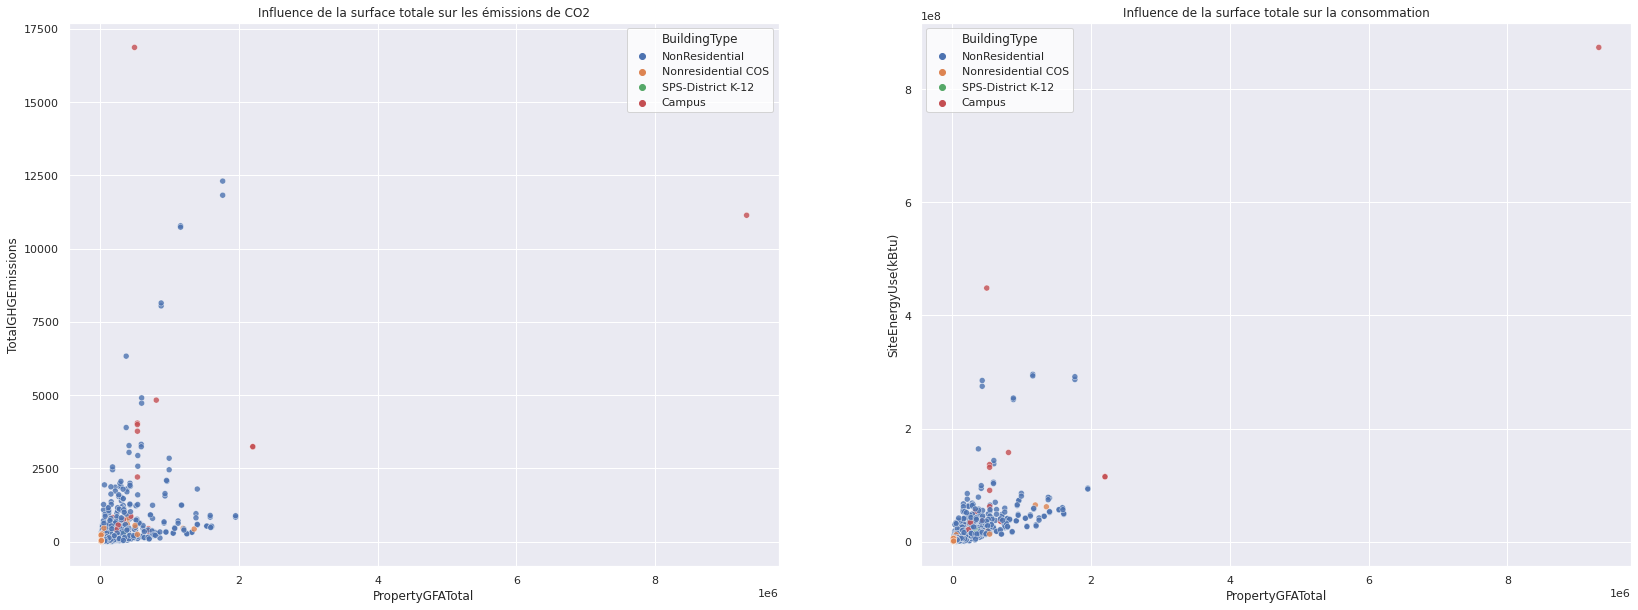

In [78]:
sns.set()
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (20,10)
sns.set(style="whitegrid",font_scale = 1)

sns.scatterplot(data=data_merge,x='PropertyGFATotal', y='TotalGHGEmissions',hue='BuildingType', alpha=.8,ax=axes[0])
sns.scatterplot(data=data_merge,x='PropertyGFATotal', y='SiteEnergyUse(kBtu)',hue='BuildingType', alpha=.8, ax=axes[1])

axes[0].set_title('Influence de la surface totale sur les émissions de CO2')
axes[1].set_title('Influence de la surface totale sur la consommation')

On observe que 2 campus sortent du lot. En effet, d'une part, ils correspondent aux valeurs max de consommation et d'émissions de CO2 et d'autre part, l'un des deux a une surface plus de 8x supérieur à la moyenne. Une raison supplémentaire est de dire qu'il n'est présent que dans le jeu de test et pas dans celui d'entrainement.  
Choix de supprimer ces 2 outliers (choix initial de ne pas les supprimer mais les modèles (notamment linéaire) sont largement perturbés par ces 2 outliers. 

Donc limitation de la surface à 3 millions et suppression outlier sur consommation et emission

In [79]:
# Application des 2 suppressions
data_merge = data_merge[data_merge['PropertyGFATotal']<3000000]
data_merge.drop(data_merge[data_merge['TotalGHGEmissions']>17000].index,inplace=True)

/tmp/ipykernel_291599/2792604702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merge.drop(data_merge[data_merge['TotalGHGEmissions']>17000].index,inplace=True)


### 2-10-3) Impact de l'âge du bâtiment

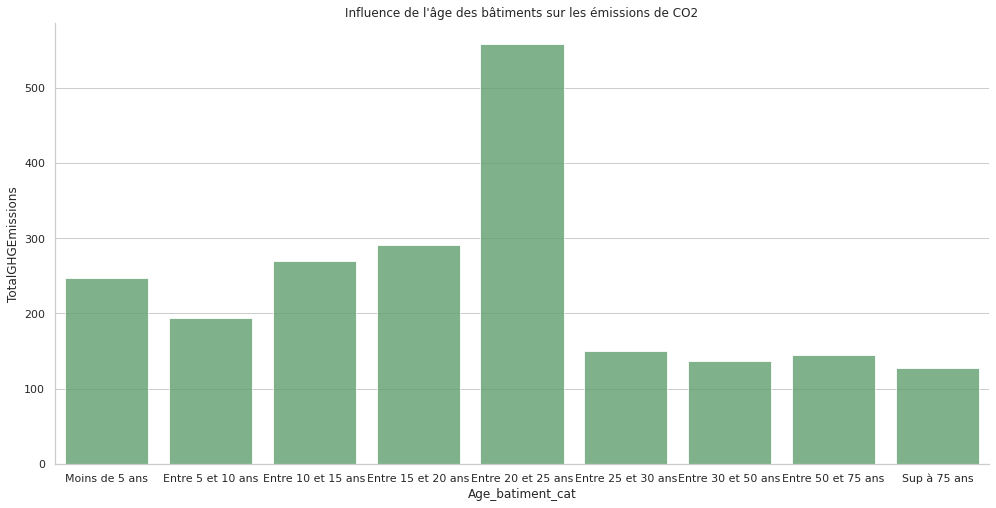

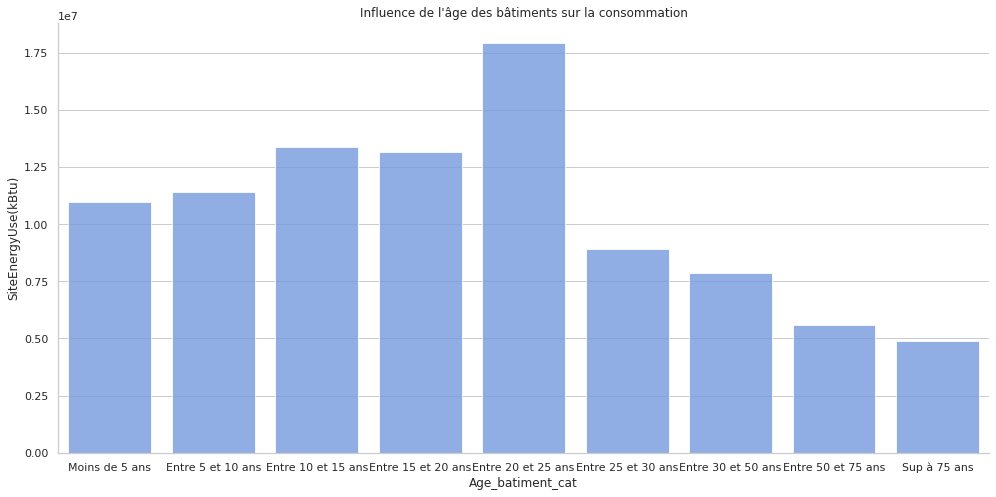

In [80]:
sns.set()
# plt.rcParams["figure.figsize"] = (28,10)

sns.set(style="whitegrid",font_scale = 1)  # grille du fond + taille de toutes les polices

sns.catplot(
    data=data_merge, kind="bar",
    x='Age_batiment_cat', y='TotalGHGEmissions',
    ci=None, alpha=.8, color ='g',
    height=7, aspect=2)
plt.title("Influence de l'âge des bâtiments sur les émissions de CO2")

sns.catplot(
    data=data_merge, kind="bar",
    x='Age_batiment_cat', y='SiteEnergyUse(kBtu)',
    ci=None, alpha=.8,color= 'cornflowerblue',
    height=7, aspect=2)

plt.title("Influence de l'âge des bâtiments sur la consommation")
plt.show()


### 2-10-4) Impact de la position

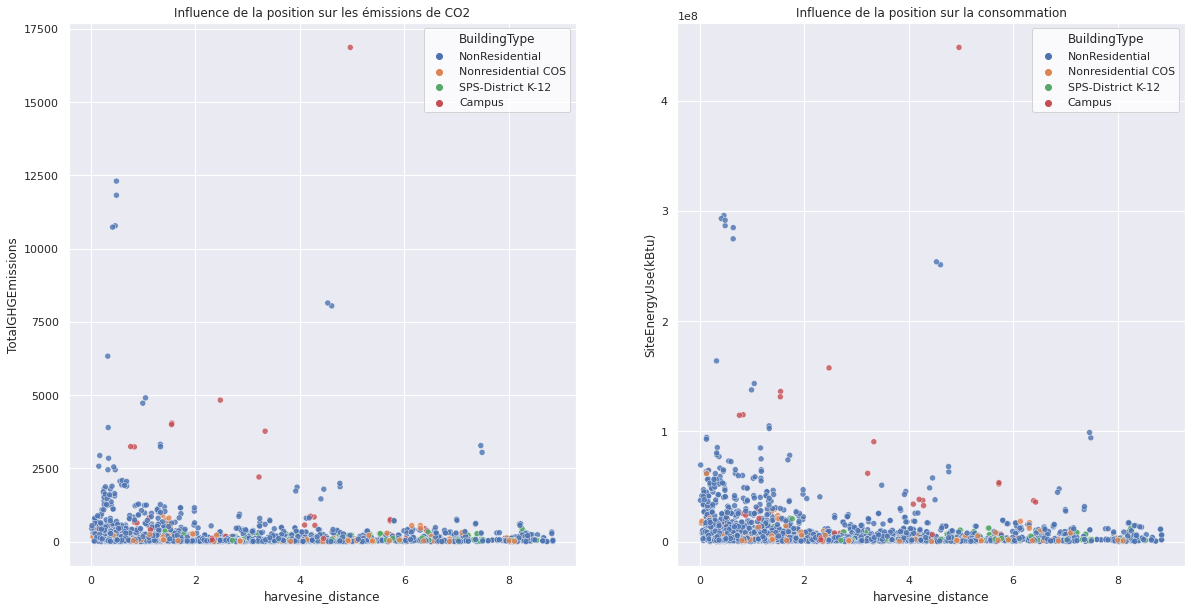

In [81]:
sns.set()
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (20,10)
sns.set(style="whitegrid",font_scale = 1)

sns.scatterplot(data=data_merge,x='harvesine_distance', y='TotalGHGEmissions',hue='BuildingType', alpha=.8,ax=axes[0])
sns.scatterplot(data=data_merge,x='harvesine_distance', y='SiteEnergyUse(kBtu)',hue='BuildingType', alpha=.8, ax=axes[1])

axes[0].set_title('Influence de la position sur les émissions de CO2')
axes[1].set_title('Influence de la position sur la consommation')

plt.show()

Il semblerait que les émissions et la consommation soient plus importantes près du centre de Seattle.

### 2-11) Analyse de la feature Outliers

In [82]:
# Observation de la colonne outlier
data_merge.Outlier.value_counts()

Low Outlier     15
Low outlier     15
High Outlier    14
High outlier     2
Name: Outlier, dtype: int64

In [83]:
# Valeur de la moyenne des émissions sur les outliers indiqué comme High
data_merge[(data_merge.Outlier == 'High Outlier') | (data_merge.Outlier == 'High outlier')]['TotalGHGEmissions'].mean()

343.655625

In [84]:
# Valeur de la moyenne de la consommation émissions sur les outliers indiqué comme High
data_merge[(data_merge.Outlier == 'High Outlier')| (data_merge.Outlier == 'High outlier')]['SiteEnergyUse(kBtu)'].mean()
# data_merge[data_merge['Outlier'].notna()]['SiteEnergyUse(kBtu)_log'].mean()

20523515.4375

In [85]:
data_merge.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,Latitude,Longitude,TotalUseTypeNumber,Age_batiment,Surface_taux_batiments,Surface_par_etage,Surface_par_batiment,harvesine_distance,Electricity_proportion,NaturalGas_proportion,Steam_proportion
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3.282000e+03,2205.000000,3282.000000,3282.000000,3.282000e+03,3.282000e+03,3.282000e+03,3.282000e+03,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3.282000e+03,3.282000e+03,3282.000000,3282.000000,3282.000000,3282.000000
mean,15962.538696,2015.501828,4.369287,1.085009,4.209628,1.130035e+05,64.809070,71.989640,176.581018,7.860806e+06,4.715681e+05,5.476408e+06,1.886619e+06,174.775104,47.615954,-122.333024,1.876295,54.025594,0.937960,3.337958e+04,1.063856e+05,2.795602,0.701648,0.275776,0.021102
std,13372.517089,0.500073,2.195172,1.139103,6.131888,1.933312e+05,28.552389,72.417369,180.983420,2.034838e+07,5.036343e+06,1.326676e+07,7.929108e+06,641.073575,0.047932,0.024463,1.195054,32.751286,0.138922,4.872347e+04,1.825179e+05,2.210597,0.261431,0.262341,0.090838
min,1.000000,2015.000000,1.000000,0.000000,0.000000,1.128500e+04,1.000000,0.200000,-2.000000,1.144100e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.080000,47.499170,-122.411820,1.000000,1.000000,0.104977,1.000000e-15,1.000000e-15,0.017588,0.000000,0.000000,0.000000
25%,580.250000,2015.000000,2.000000,1.000000,1.000000,2.940000e+04,47.000000,33.500000,77.000000,1.235970e+06,0.000000e+00,7.278888e+05,0.000000e+00,19.900000,47.585595,-122.343280,1.000000,27.000000,1.000000,1.251477e+04,2.838000e+04,0.860329,0.495163,0.000000,0.000000
50%,21125.000000,2016.000000,4.000000,1.000000,3.000000,4.905900e+04,72.000000,52.000000,131.800002,2.542779e+06,0.000000e+00,1.635384e+06,4.879335e+05,49.270000,47.612300,-122.333035,2.000000,50.000000,1.000000,2.219967e+04,4.722600e+04,2.237218,0.706149,0.238338,0.000000
75%,24560.000000,2016.000000,7.000000,1.000000,5.000000,1.048715e+05,89.000000,81.975000,206.350000,6.963231e+06,0.000000e+00,4.897172e+06,1.481439e+06,139.232500,47.649088,-122.321932,2.000000,86.000000,1.000000,3.741500e+04,1.002345e+05,4.241887,0.999982,0.485785,0.000000
max,50226.000000,2016.000000,7.000000,39.000000,76.000000,2.200000e+06,100.000000,834.400024,2620.000000,4.483853e+08,1.349435e+08,2.847263e+08,2.979090e+08,16870.980000,47.733870,-122.258640,13.000000,116.000000,1.000029,1.100000e+06,2.200000e+06,8.843744,1.000087,1.000000,0.830998


On constate que sont notés Outliers les bâtiments pour lesquels et la consommation et les emissions de CO2 sont au dessus de l'écart intercartile.  
Choix de les conserver à ce stade.

## 3) Mise au propre de la matrice finale

In [86]:
# Suppression des colonnes non utiles,redondantes ou liées au data linkage

colonnes_a_supp_2 = ['YearsENERGYSTARCertified','SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)','SteamUse(kBtu)','Electricity(kBtu)',
                     'NaturalGas(kBtu)','Outlier','Latitude','Longitude']
colonnes_a_supp_2_futur = ['YearsENERGYSTARCertified','SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)','SteamUse(kBtu)','Electricity(kBtu)',
                     'NaturalGas(kBtu)','Latitude','Longitude']
data_merge.drop(colonnes_a_supp_2,axis=1,inplace=True)
df_annees_futures.drop(colonnes_a_supp_2_futur,axis=1,inplace=True)

/tmp/ipykernel_291599/1308472620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merge.drop(colonnes_a_supp_2,axis=1,inplace=True)


In [87]:
# Déplacement des colonnes conso et gas à la fin du DataFrame
data_export = data_merge.reindex(columns=['OSEBuildingID','DataYear','BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'Age_batiment', 'Age_batiment_cat','NumberofBuildings','NumberofBuildings_cat',
       'NumberofFloors','NumberofFloors_cat', 'PropertyGFATotal','Surface_taux_batiments','Surface_par_etage','Surface_par_batiment',
        'TotalUseTypeNumber','LargestPropertyUseType', 'harvesine_distance',
       'Electricity_proportion','NaturalGas_proportion','Steam_proportion','ENERGYSTARScore','SiteEnergyUse(kBtu)','TotalGHGEmissions'])
data_export.reset_index(drop=True,inplace=True)

# Déplacement des colonnes conso et gas à la fin du DataFrame
data_annees_futures = df_annees_futures.reindex(columns=['OSEBuildingID','DataYear','BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'Age_batiment', 'Age_batiment_cat','NumberofBuildings','NumberofBuildings_cat',
       'NumberofFloors','NumberofFloors_cat', 'PropertyGFATotal','Surface_taux_batiments','Surface_par_etage','Surface_par_batiment',
        'TotalUseTypeNumber','LargestPropertyUseType', 'harvesine_distance',
       'Electricity_proportion','NaturalGas_proportion','Steam_proportion','ENERGYSTARScore','SiteEnergyUse(kBtu)','TotalGHGEmissions'])
data_annees_futures.reset_index(drop=True,inplace=True)

### 4) Exportation de la matrice

In [88]:
data_export.set_index("OSEBuildingID").to_csv("Data-cleaned.csv")
data_annees_futures.set_index("OSEBuildingID").to_csv("Data-cleaned-annees-futures.csv")